In [2]:
#Version
from qiskit import *
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.17.0'}

# Bernstein-Vazirani Algorithm

Bernstein-Vazirani algorithm allows us to determine a secret number stored inside a box. The algorithm was described by Ethan Bernstein and Umesh Vazirani.

Formal Definition: The algorithm solves the following problem: <br>given a function $f: \{0,1\}^n \rightarrow \{0,1\} $ which takes an $n$ bit string as input and outputs a single bit where there is exactly one $n$ bit string $s \in \{0,1\}^n$ that returns a value $f(s) = 1$, what is $s$?. 

In other words, for each input $x$, $f(x) = s \cdot x \, \text{(mod 2)}$. We are expected to find $s$.

To find $s$ classically, we would have to call the function $f(x)$ $n$ times, each time determining one of the bits of $s$.

On the other hand, a quantum algorithm can solve the problem in only one step! This gives a polynomial speed-up with respect to the classical algorithm. Let us see the quantum circuit which implements the corresponding algorithm.

Explanation:

Consider a hidden Boolean function $f$ which takes in a string of $n$ bits $\{x_0, x_1, \ldots x_{n-1}\}$ and 
returns 1 for only a unique n-bit string $s = \{s_0, s_1, \ldots s_{n-1}\}$ and 0 otherwise.

How many attempts do we need to make in order to find the secret number $s$?

Classically, we covered two approaches.

For an n-bit secret number, the first approach is to try all possible numbers from 0 to $2^n-1$. This leads to an exponential number of attempts as $n$ grows.

The second approach assumes that if the box isn't just giving a yes/no result if the number matches, but instead computes $s.x$ modulo 2, (this is a yes/no result as well, but we are now computing the bitwise AND between the two numbers $s$ and $x$, and adding up the results, and finally returning the sum modulo 2) then we can be a bit more clever and give the box $n$ different inputs (namely $2^0, 2^1, 2^2, \ldots, 2^{n-1}$) to reveal each of its bits. Check out the video to see how this works. This method means that we would need to make $n$ attempts to find the secret number.

The Bernstein-Vazirani algorithm allows us to find the secret number in 1 attempt, independent of the size of the secret number. For the mathematics behind how the algorithm works, check out the Bernstein-Vazirani section in our open-source Qiskit textbook.

Bernstein-Vazirani algorithm shows a quantum speed-up. 


## Quantum circuit for the Bernstein-Vazirani Algorithm

The quantum circuit that implements the Bernstein-Vazirani algorithm is shown below.

<img src="images/vazirani1.jpeg" width="300">

Here, $\text{Q}_f$ is the same query function as for the Deutsch algorithm, but now acts on $n$ qubits:
$$ \lvert x \rangle \rightarrow (-1)^{f(x)} \lvert x \rangle $$

The algorithm proceeds as follows.

<ol>
    <li> The input register is initialized to the zero state $$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} $$ </li><p></p>
    <li> Apply Hadamard on all qubits to get a uniform superposition of all $n$-bit strings 
    $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle  $$
   </li><p></p>
    <li>We make a query $\text{Q}_f$, 
    $$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } (-1)^{f(x)} \lvert x \rangle \\
    = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } (-1)^{s_1 \cdot x_1} ... (-1)^{s_n \cdot x_n} \lvert x \rangle \\
    = \frac{\lvert 0 \rangle + (-1)^{s_1} \lvert 1 \rangle }{\sqrt{2}} \otimes ... \otimes \frac{\lvert 0 \rangle + (-1)^{s_n} \lvert 1 \rangle }{\sqrt{2}}   $$
   </li><p></p>
    <li> Apply Hadamard on all qubits
        $$ \lvert \psi_4 \rangle = \lvert s_1 \rangle ... \lvert s_n \rangle $$
   </li><p></p>
    <li> Measuring all $n$ qubits will give the secret $n$-bit string $s$
    </li>
</ol>

As mentioned above, the quantum algorithm provides a polynomial speed-up against the best classical algorithm. Although the problem still feels like it is purposely designed so that it will be easier to solve on a quantum computer, at the time it was quite an achievement to prove that such a speed-up was even possible.

## Example 

An example of realization of the Bernstein-Vazirani algorithm can be found in [1]. Again, the algorithm makes use of an ancilla qubit to implement the query function $Q_f$. Let us see the steps of the algorithm for $n=2$ qubits and a secret string $s=11$

<img src="images/vazirani_ex1.jpeg"  width="300">

<ol>
    <li> The input registers are initialized to zero and the ancilla qubit to one 
    $$\lvert \psi_1 \rangle = \lvert 0 0 \rangle \lvert 1 \rangle_a $$ 
   </li><p></p>
    
   <li> Apply Hadamard on all qubits
    $$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right)  $$ 
   </li><p></p>
    
   <li> For the string $s=11$, the query function can be implemented as $\text{Q}_f = CX_{1a}CX_{2a}$, 
    $$ \lvert \psi_3 \rangle = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle \left( \lvert 0 \oplus 0 \oplus 0 \rangle_a - \lvert 1 \oplus 0 \oplus 0 \rangle_a \right)+ \lvert 0 1 \rangle  \left( \lvert 0 \oplus 0 \oplus 1 \rangle_a - \lvert 1 \oplus 0 \oplus 1 \rangle_a \right) + \lvert 1 0 \rangle  \left( \lvert 0 \oplus 1 \oplus 0 \rangle_a - \lvert 1 \oplus 1 \oplus 0 \rangle_a \right) + \lvert 1 1 \rangle  \left( \lvert 0 \oplus 1 \oplus 1 \rangle_a - \lvert 1 \oplus 1 \oplus 1 \rangle_a \right)  \right] $$ 
   </li><p></p>
    
   Thus
    $$ \lvert \psi_3 \rangle = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right) - \lvert 0 1 \rangle  \left( \lvert 0 \rangle_a - \lvert  1 \rangle_a \right) - \lvert 1 0 \rangle  \left( \lvert 0  \rangle_a - \lvert 1 \rangle_a \right) + \lvert 1 1 \rangle  \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right)  \right] \\
   = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right)  \\
    = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)\frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)\frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right)$$
    
   </li><p></p>
    
   <li> Apply Hadamard on all qubits
        $$ \lvert \psi_4 \rangle = \lvert 1 \rangle \lvert 1 \rangle \lvert 1 \rangle $$
   </li><p></p>
   
   <li> Measuring the first two qubits will give the secret $2$-bit string $s = 11$
   </li><p></p>
</ol>

## Qiskit Implementation

We now implement the Bernstein-Vazirani algorithm with Qiskit by first preparing the environment.

In [3]:
#Building the circuit for the Bernstein-Vazirani algorithm
#We begin by writing down the secret number.
s = '110101'

#The algorithm requires $n+1$ qubits and $n$ classical bits, where $n$ is the length of the secret number.
n = len(s)
circuit = QuantumCircuit(n+1,n)

#The algorithm has four main parts.
#Initialize the first $n$ qubits in the state $\vert0\rangle$, and the last qubit in the $\vert1\rangle$ state. In Qiskit, all qubits are initialized in the $\vert0\rangle$ state, so we don't need to do anything to the first $n$ qubits. For the last qubit, we initialize it to $\vert1\rangle$ state by applying an $X$ gate.
#Apply Hadamard gates to all qubits.
#Build the box containing the secret number (also known as an "oracle"). We will build it as a function that computes $s.x$ modulo 2 by applying $CX$ gates from the first $n$ qubits onto the last qubit whenever there is a $1$ in the secret number. We will do this in reverse order, meaning that the there will be a $CX$ gate from the $n$th qubit to the last qubit if the first bit of the secret number is 1.
#Measure the first $n$ qubits in the Bell basis. This means applying Hadamard gates to the first $n$ qubits again before applying measurements.

# Step 0
circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n
circuit.barrier() # just a visual aid for now

# Step 1
circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits
circuit.barrier() # just a visual aid for now

# Step 2
for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
circuit.barrier() # just a visual aid for now

# Step 3
circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits
circuit.barrier() # just a visual aid for now

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 and store them into the classical bits indexed 0 to n-1

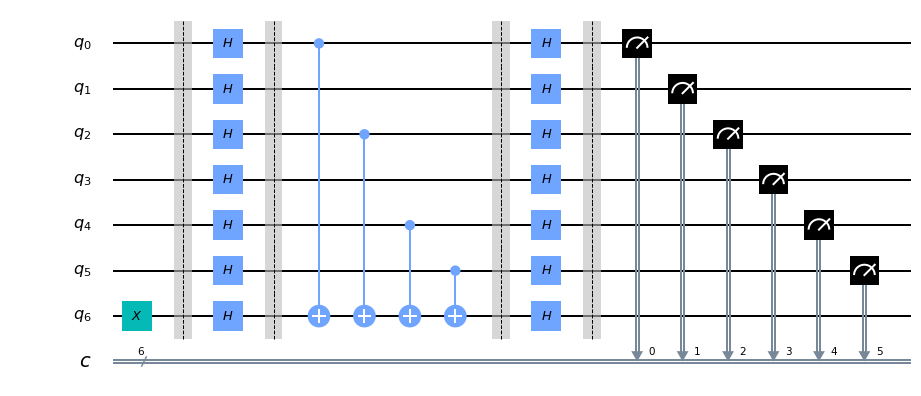

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

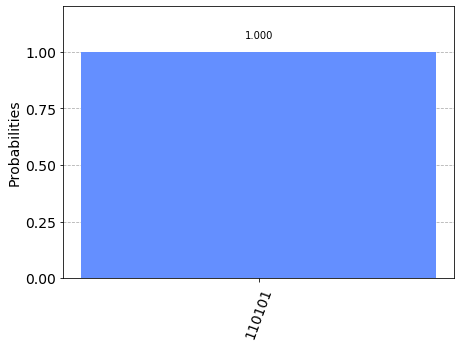

In [4]:
#Running the Bernstein-Vazirani algorithm
#And finally, let's simulate the circuit on Aer's qasm_simulator. We will set the number of shots to 1.
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

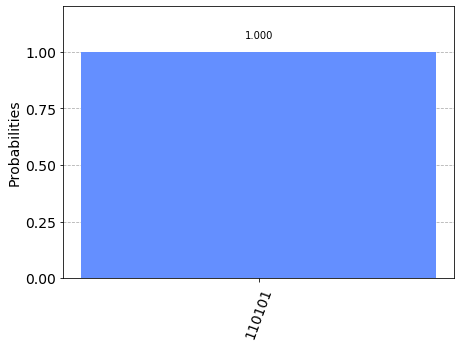

In [5]:
#In fact, setting the number of shots to 1000, we can still see that 100% of the results contain the secret number.
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1000).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [6]:
#References
#Journal Papers
#Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, doi:10.1137/S0097539796300921).
#For a pedagogical presentation of the mathematics behind the Bernstein-Vazirani algorithm, check out our open-source Learn Quantum Computation using Qiskit textbook:
#https://community.qiskit.org/textbook/